# Q 1 :-

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
Occupations
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called users
Step 4. Discover what is the mean age per occupation
Step 5. Discover the Male ratio per occupation and sort it from the most to the least
Step 6. For each occupation, calculate the minimum and maximum ages
Step 7. For each combination of occupation and sex, calculate the mean age
Step 8. For each occupation present the percentage of women and men

Step 1. Import the necessary libraries

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2. Import the dataset from this address.

In [3]:
url= 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users= pd.read_csv(url, sep='|', index_col='user_id')

Step 3. Assign it to a variable called users

In [5]:
users

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


Step 4. Discover what is the mean age per occupation

In [4]:
users.age.mean()

34.05196182396607

Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [6]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [7]:
separate_genders = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

In [11]:
separate_genders

gender,F,M,New column for male Ratio
occupation,,,
administrator,36,43,54.4
artist,13,15,53.6
doctor,0,7,100.0
educator,26,69,72.6
engineer,2,65,97.0
entertainment,2,16,88.9
executive,3,29,90.6
healthcare,11,5,31.2
homemaker,6,1,14.3


In [12]:
sums= separate_genders[['F', 'M']].sum(axis=1)
separate_genders['New column for male Ratio'] = round(100 * separate_genders['M'] / sums , 1)
x1 =separate_genders['New column for male Ratio']
x1.sort_values(ascending=False)

occupation
doctor           100.0
engineer          97.0
technician        96.3
retired           92.9
programmer        90.9
executive         90.6
scientist         90.3
entertainment     88.9
lawyer            83.3
salesman          75.0
educator          72.6
student           69.4
other             65.7
marketing         61.5
writer            57.8
none              55.6
administrator     54.4
artist            53.6
librarian         43.1
healthcare        31.2
homemaker         14.3
Name: New column for male Ratio, dtype: float64

Step 6. For each occupation, calculate the minimum and maximum ages

In [9]:
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


Step 7. For each combination of occupation and sex, calculate the mean age

In [10]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

Step 8. For each occupation present the percentage of women and men

In [13]:
x=users.groupby(['occupation', 'gender']).count()
y=users.groupby('occupation').count()

In [14]:
x= x.drop(columns='zip_code')
y= y.drop(columns='zip_code')

In [15]:
z=(x/y)*100
z= z.drop(columns='gender')

In [16]:
z

age
occupation    gender            
administrator F        45.569620
              M        54.430380
artist        F        46.428571
              M        53.571429
doctor        M       100.000000
educator      F        27.368421
              M        72.631579
engineer      F         2.985075
              M        97.014925
entertainment F        11.111111
              M        88.888889
executive     F         9.375000
              M        90.625000
healthcare    F        68.750000
              M        31.250000
homemaker     F        85.714286
              M        14.285714
lawyer        F        16.666667
              M        83.333333
librarian     F        56.862745
              M        43.137255
marketing     F        38.461538
              M        61.538462
none          F        44.444444
              M        55.555556
other         F        34.285714
              M        65.714286
programmer    F         9.090909
              M        90.909091
retired       F         7.142857
              M        92.857143
salesman      F        25.000000
              M        75.000000
scientist     F         9.677419
              M        90.322581
student       F        30.612245
              M        69.387755
technician    F         3.703704
              M        96.296296
writer        F        42.222222
              M        57.777778

# Q 2 :-

Euro Teams
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12
Step 4. Select only the Goal column
Step 5. How many team participated in the Euro2012?
Step 6. What is the number of columns in the dataset?
Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
Step 8. Sort the teams by Red Cards, then to Yellow Cards
Step 9. Calculate the mean Yellow Cards given per Team
Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G
Step 12. Select the first 7 columns
Step 13. Select all columns except the last 3
Step 14. Present only the Shooting Accuracy from England, Italy and Russia

Step 1. Import the necessary libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2. Import the dataset from this address
Step 3. Assign it to a variable called euro12

In [21]:
euro12=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

Step 4. Select only the Goal column

In [22]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Step 5. How many team participated in the Euro2012?

In [24]:
len(euro12['Team'].unique())
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

Step 6. What is the number of columns in the dataset?

In [20]:
len(euro12.columns)

35

Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [25]:
discipline=pd.DataFrame(euro12, columns=['Team','Yellow Cards', 'Red Cards'])

In [26]:
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [23]:
discipline.sort_values(['Red Cards','Yellow Cards'], ascending=[True, True])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


Step 9. Calculate the mean Yellow Cards given per Team

In [24]:
discipline.groupby('Team')['Yellow Cards'].mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow Cards, dtype: int64

Step 10. Filter teams that scored more than 6 goalsStep 11. Select the teams that start with G

In [30]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


Step 11. Select the teams that start with G

In [31]:
euro12[euro12.Team.str[0] == 'G']

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


Step 12. Select the first 7 columns

In [32]:
euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


Step 13. Select all columns except the last 3

In [33]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [34]:
euro12.loc[[3,7,12] , ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Q 3 :-

Housing
Step 1. Import the necessary libraries
Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000
Step 3. Create a DataFrame by joinning the Series by column
Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
Step 6. Ops it seems it is going only until index 99. Is it true?
Step 7. Reindex the DataFrame so it goes from 0 to 299

Step 1. Import the necessary libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2. Create 3 differents Series, each of length 100, as follows:
• The first a random number from 1 to 4
• The second a random number from 1 to 3
• The third a random number from 10,000 to 30,000

In [163]:
first_random = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
second_random = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
third_random = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

Step 3. Create a DataFrame by joinning the Series by column

In [164]:
Housing = pd.concat([first_random, second_random, third_random], axis=1)
Housing

,0,1,2
0,3,2,20920
1,4,1,19574
2,3,3,26289
3,2,2,14327
4,3,3,21374
...,...,...,...
95,3,3,28868
96,1,2,10979
97,3,2,23370
98,2,2,15227


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [165]:
Housing.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
Housing

,bedrs,bathrs,price_sqr_meter
0,3,2,20920
1,4,1,19574
2,3,3,26289
3,2,2,14327
4,3,3,21374
...,...,...,...
95,3,3,28868
96,1,2,10979
97,3,2,23370
98,2,2,15227


Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [169]:
bigcolumn = pd.DataFrame(pd.concat([first_random, second_random, third_random], axis=0))
bigcolumn

,0
0,3
1,4
2,3
3,2
4,3
...,...
95,28868
96,10979
97,23370
98,15227


Step 6. Ops it seems it is going only until index 99. Is it true?

In [170]:
bigcolumn.iloc[0:150,]

,0
0,3
1,4
2,3
3,2
4,3
...,...
45,2
46,2
47,3
48,1


Step 7. Reindex the DataFrame so it goes from 0 to 299

In [171]:
bigcolumn.reset_index(inplace = True) 
bigcolumn.iloc[0:299,]

,index,0
0,0,3
1,1,4
2,2,3
3,3,2
4,4,3
...,...,...
294,94,21301
295,95,28868
296,96,10979
297,97,23370


# Q 4 :-

Wind Statistics
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
Step 1. Import the necessary libraries
Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
Step 7. Compute how many non-missing values there are in total.
Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.
Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.
Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
A different set of numbers for each day.
Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.
Step 12. Downsample the record to a yearly frequency for each location.
Step 13. Downsample the record to a monthly frequency for each location.
Step 14. Downsample the record to a weekly frequency for each location.
Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

Wind data Link:- https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data

Step 1. Import the necessary libraries

In [48]:
import datetime

Step 2. Import the dataset from this address
Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [49]:
data=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data',sep="\s+",parse_dates=[[0,1,2]])

In [50]:
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [51]:
def function(x):
  year=x.year-100 if x.year > 1979 else x.year
  return datetime.date(year,x.month,x.day)
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(function)
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [52]:
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

In [53]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Step 7. Compute how many non-missing values there are in total.

In [54]:
data.shape[0]-data.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.A single number for the entire dataset.

In [56]:
Mn= data.mean()
Mn.mean()

10.227982360836924

Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
A different set of numbers for each location.

In [57]:
loc_stats=pd.DataFrame()
loc_stats['min']=data.min()
loc_stats['max']=data.max()
loc_stats['mean']=data.mean()
loc_stats['std']=data.std()
loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.A different set of numbers for each day.

In [59]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)

In [60]:
day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


Step 11. Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [61]:
data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
january_winds=data.query('month==1')
january_winds
january_winds.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

Step 12. Downsample the record to a yearly frequency for each location.

In [62]:
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


Step 13. Downsample the record to a monthly frequency for each location.

In [63]:
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


Step 14. Downsample the record to a weekly frequency for each location.

In [64]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000,1.000000,1961.0,1.000000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571,1.000000,1961.0,5.000000
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286,1.000000,1961.0,12.000000
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286,1.000000,1961.0,19.000000
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000,1.000000,1961.0,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571,11.428571,1978.0,17.142857
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429,12.000000,1978.0,7.000000
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857,12.000000,1978.0,14.000000


Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [65]:
weekly = data.resample('W').agg(['min','max','mean','std'])
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

# Q 5 :-

Step 1. Import the necessary libraries
Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.
Step 4. See the first 10 entries
Step 5. What is the number of observations in the dataset?
Step 6. What is the number of columns in the dataset?
Step 7. Print the name of all the columns.
Step 8. How is the dataset indexed?
Step 9. Which was the most-ordered item?
Step 10. For the most-ordered item, how many items were ordered?
Step 11. What was the most ordered item in the choice_description column?
Step 12. How many items were orderd in total?
Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type
Step 14. How much was the revenue for the period in the dataset?
Step 15. How many orders were made in the period?
Step 16. What is the average revenue amount per order?
Step 17. How many different items are sold?

Step 1. Import the necessary libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2. Import the dataset from this address.
Step 3. Assign it to a variable called chipo.

In [87]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

Step 4. See the first 10 entries

In [88]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 5. What is the number of observations in the dataset?

In [89]:
chipo.shape[0]

4622

Step 6. What is the number of columns in the dataset?

In [90]:
len(chipo.columns)

5

Step 7. Print the name of all the columns.

In [91]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 8. How is the dataset indexed?

In [92]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

Step 9. Which was the most-ordered item?

In [93]:
Most_ordered= chipo.item_name.value_counts()
Most_ordered.head(1)

Chicken Bowl    726
Name: item_name, dtype: int64

Step 10. For the most-ordered item, how many items were ordered?

In [94]:
len(chipo['item_name'].unique())

50

Step 11. What was the most ordered item in the choice_description column?

In [95]:
Most_ord_choice_description =chipo.choice_description.value_counts()
Most_ord_choice_description.head(1)

[Diet Coke]    134
Name: choice_description, dtype: int64

Step 12. How many items were orderd in total?

In [96]:
chipo.quantity.sum()

4972

Step 13.
• Turn the item price into a float
• Check the item price type
• Create a lambda function and change the type of item price
• Check the item price type

In [97]:
def turn(x):
    return float(x[1:-1])
chipo.item_price = chipo.item_price.apply(turn)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [98]:
chipo.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [64]:
chipo.item_price.dtypes

dtype('float64')

Step 14. How much was the revenue for the period in the dataset?

In [65]:
chipo.item_price.sum()

34500.16

Step 15. How many orders were made in the period?

In [66]:
len(chipo['order_id'].value_counts())

1834

Step 16. What is the average revenue amount per order?

In [99]:
avgrev = chipo.groupby(['order_id']).sum()

In [100]:
avgrev

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [69]:
avgrev['item_price'].mean()

18.81142857142869

Step 17. How many different items are sold?

In [101]:
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [102]:
diff_items= len(chipo['item_name'].unique())

In [103]:
diff_items

50

# Q 6 :-

Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!

In [125]:
md= pd.read_csv(r'C:\Users\Murari\Desktop\DP Assignment_19th_Aug_2021\us-marriages-divorces-1867-2014.csv')

In [126]:
md

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
...,...,...,...,...,...,...
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8


Text(0.5, 1.0, ' number of marriages and divorces per capita in the U.S. between 1867 to 2014')

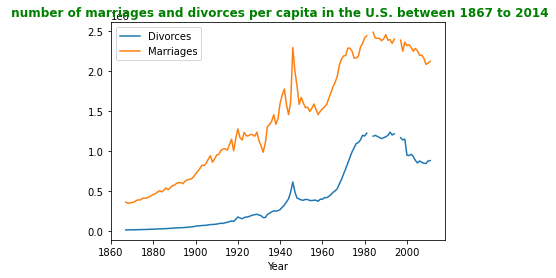

In [175]:
md.plot.line(x='Year', y={'Marriages','Divorces'})
plt.title(' number of marriages and divorces per capita in the U.S. between 1867 to 2014', fontsize=12, color = 'Green',fontweight='bold')

# Q 7 :-

Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [128]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'number of marriages and divorces per capita in the U.S. between 1867 to 2014')

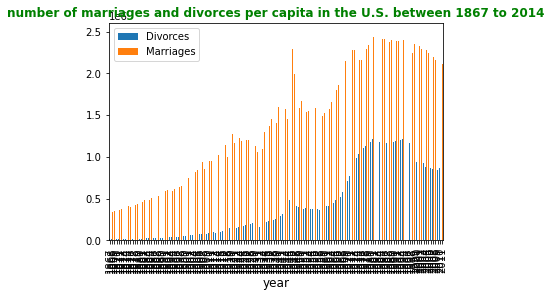

In [141]:
md.plot.bar(x='Year', y={'Marriages','Divorces'})
plt.xlabel('year', fontsize=12)
plt.title('number of marriages and divorces per capita in the U.S. between 1867 to 2014', fontsize=12, color = 'Green',fontweight='bold')

# Q 8 :-

Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

In [142]:
Hollywood=pd.read_csv(r'C:\Users\Murari\Desktop\DP Assignment_19th_Aug_2021\actor_kill_counts.csv')

In [143]:
Hollywood

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [144]:
HW= Hollywood.sort_values(['Count','Actor'], ascending=[True, False])
HW

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


Text(0.5, 1.0, 'deadliest actors in Hollywood.')

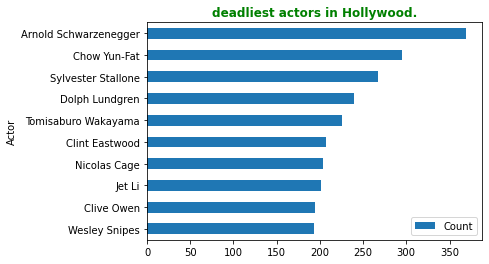

In [146]:
HW.plot.barh(x='Actor', y='Count')
plt.title('deadliest actors in Hollywood.', fontsize=12, color = 'Green',fontweight='bold')

# Q 9 :-

Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [177]:
RE=pd.read_csv(r'C:\Users\Murari\Desktop\DP Assignment_19th_Aug_2021\roman-emperor-reigns.csv')

In [ ]:
RE = RE[(RE == 'Assassinated').any(axis=1)]
RE
df = pd.DataFrame({'mass': RE['Length_of_Reign'],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=RE['Emperor'])
plot = RE.plot.pie(y='mass', figsize=(5, 5))


In [179]:
RE = RE.pivot_table(index='Emperor', columns='Cause_of_Death', aggfunc='size', fill_value=0)

In [180]:
RE

Cause_of_Death,Assassinated
Emperor,
Aemilian,1
Aurelian,1
Balbinus,1
Caligula,1
Caracalla,1
Commodus,1
Constans I,1
Domitian,1
Elagabalus,1


In [181]:
sum1= RE[['Assassinated']].sum(axis=1)
RE['percentage of Assassinated'] = round(100 * RE['Assassinated'] / sum1 , 1)
x2 =RE['percentage of Assassinated']
x2.sort_values(ascending=False)

Emperor
Aemilian              100.0
Aurelian              100.0
Trebonianus Gallus    100.0
Severus II            100.0
Severus Alexander     100.0
Pupienus              100.0
Probus                100.0
Pertinax              100.0
Maximinus I           100.0
Gratian               100.0
Geta                  100.0
Gallienus             100.0
Galba                 100.0
Florian               100.0
Elagabalus            100.0
Domitian              100.0
Constans I            100.0
Commodus              100.0
Caracalla             100.0
Caligula              100.0
Balbinus              100.0
Vitellius             100.0
Name: percentage of Assassinated, dtype: float64

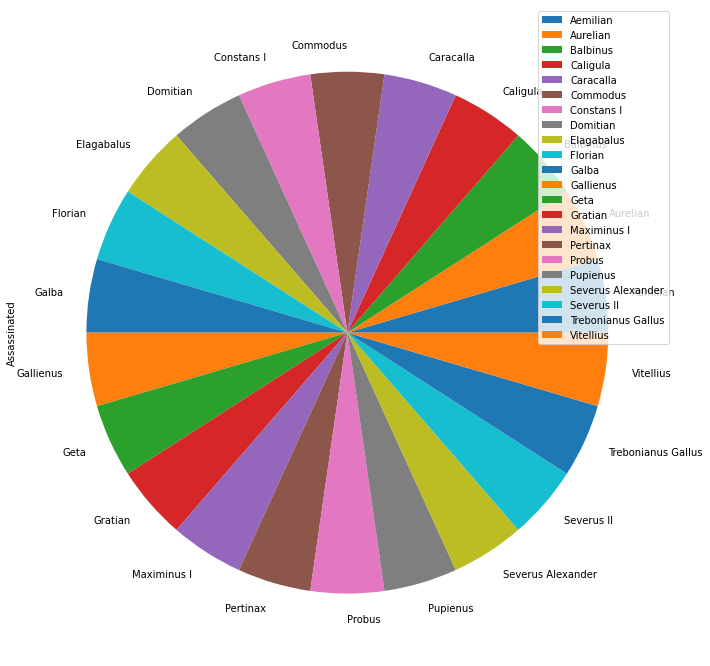

In [182]:
plot = RE.plot.pie(y='Assassinated', figsize=(36,12))

# Q 10 :-

Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year.

In [156]:
relation=pd.read_csv(r'C:\Users\Murari\Desktop\DP Assignment_19th_Aug_2021\arcade-revenue-vs-cs-doctorates.csv')

In [157]:
relation

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


Text(0.5, 1.0, 'relationship between the total revenue earned by arcades and the number of Computer Science PhDs')

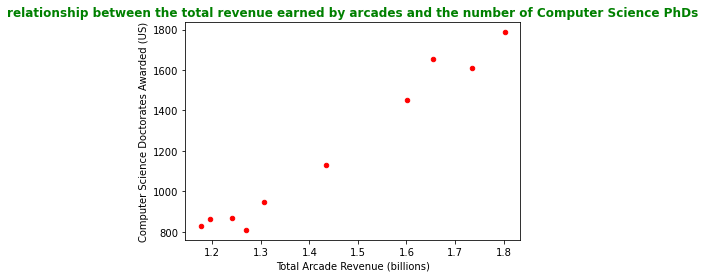

In [183]:
relation.plot.scatter(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', c='Red')
plt.title('relationship between the total revenue earned by arcades and the number of Computer Science PhDs', fontsize=12, color = 'Green',fontweight='bold')